# 目次

- 対象データ
- 目的変数
- 欠損値
- 外れ値
- 解析

# ライブラリ

In [1]:
# データ処理
import csv
import numpy as np
import pandas as pd
import scipy.stats as stats
pd.options.display.float_format = '{:.0f}'.format

# 描画
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import japanize_matplotlib
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style(style='dark')
from tqdm import tqdm # プログレスバー
mplstyle.use('fast')

# 表示調整
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP'] # 日本語対応
plt.rcParams["figure.figsize"] = [20,5] # 表示サイズ
plt.rcParams["font.size"] = 10 # 文字サイズ
# HTML対応
from IPython.core.display import display, HTML
# 全表示対応
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 対象データ

## 概観

In [2]:
# データ取得
boston_df = pd.read_csv("./boston.csv", sep=',')

In [3]:
# 項目名
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
# データ確認
boston_df.shape
boston_df.head().astype(str)
boston_df.info()
boston_df.describe().astype(str)

(506, 14)

CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  \
0               0.00632  18.0  2.31    0  0.538  6.575  65.2    4.09   1   
1               0.02731   0.0  7.07    0  0.469  6.421  78.9  4.9671   2   
2               0.02729   0.0  7.07    0  0.469  7.185  61.1  4.9671   2   
3  0.032369999999999996   0.0  2.18    0  0.458  6.998  45.8  6.0622   3   
4               0.06905   0.0  2.18    0  0.458  7.147  54.2  6.0622   3   

     TAX PTRATIO       B LSTAT  MEDV  
0  296.0    15.3   396.9  4.98  24.0  
1  242.0    17.8   396.9  9.14  21.6  
2  242.0    17.8  392.83  4.03  34.7  
3  222.0    18.7  394.63  2.94  33.4  
4  222.0    18.7   396.9  5.33  36.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM                  ZN               INDUS  \
count                506.0               506.0               506.0   
mean    3.6135235573122535  11.363636363636363  11.136778656126504   
std      8.601545105332487  23.322452994515036  6.8603529408975845   
min                0.00632                 0.0                0.46   
25%    0.08204499999999999                 0.0                5.19   
50%                0.25651                 0.0                9.69   
75%     3.6770824999999996                12.5                18.1   
max                88.9762               100.0               27.74   

                     CHAS                  NOX                  RM  \
count               506.0                506.0               506.0   
mean   0.0691699604743083   0.5546950592885372   6.284634387351787   
std    0.2539940413404118  0.11587767566755611  0.7026171434153237   
min                   0.0                0.385               3.561   
25%                   0.0                0.449              5.8855   
50%                   0.0                0.538              6.2085   
75%                   0.0                0.624              6.6235   
max                   1.0                0.871                8.78   

                      AGE                 DIS                RAD  \
count               506.0               506.0              506.0   
mean    68.57490118577078   3.795042687747034  9.549407114624506   
std    28.148861406903638  2.1057101266276104  8.707259384239377   
min                   2.9              1.1296                1.0   
25%                45.025            2.100175                4.0   
50%                  77.5  3.2074499999999997                5.0   
75%     94.07499999999999  5.1884250000000005               24.0   
max                 100.0             12.1265               24.0   

                      TAX             PTRATIO                   B  \
count               506.0               506.0               506.0   
mean    408.2371541501976  18.455533596837967  356.67403162055257   
std    168.53711605495926   2.164945523714446   91.29486438415779   
min                 187.0                12.6                0.32   
25%                 279.0                17.4            375.3775   
50%                 330.0               19.05              391.44   
75%                 666.0                20.2             396.225   
max                 711.0                22.0               396.9   

                    LSTAT                MEDV  
count               506.0               506.0  
mean   12.653063241106723  22.532806324110698  
std     7.141061511348571    9.19710408737982  
min                  1.73                 5.0  
25%     6.949999999999999              17.025  
50%                 11.36                21.2  
75%    16.955000000000002                25.0  
max                 37.97                50.0

## 属性

- 説明変数  
    - CRIM：  
    町ごとの一人当たりの犯罪率  
    - ZN：  
    25,000平方フィートを超える区画にゾーニングされた住宅用地の割合。  
    - INDUS：  
    町ごとの非小売ビジネスエーカーの割合  
    - CHAS：（int）  
    チャールズリバーダミー変数（路が川に接している場合は1、それ以外の場合は0）  
    - NOX：  
    一酸化窒素濃度（1000万あたりのパーツ）[パーツ/ 10M]  
    - RM：  
    住居あたりの平均部屋数  
    - AGE：  
    1940年以前に建設された持ち家の割合  
    - DIS：  
    ボストンの5つの雇用センターまでの加重距離  
    - RAD：（int）  
    放射状高速道路へのアクセスの指標  
    - TAX：  
    全額-価値資産、10000ドルあたりの税率($/10k)  
    - PTRATIO：  
    町ごとの生徒と教師の比率  
    - B：  
    方程式B = 1000（Bk-0.63）^ 2の結果。ここで、Bkは町ごとの黒人の割合です。
    - LSTAT：  
    人口の％低いステータス  
  
- 目的変数：  
    - MEDV：  
    1000ドル'sの[k$]における持ち家の中央値  

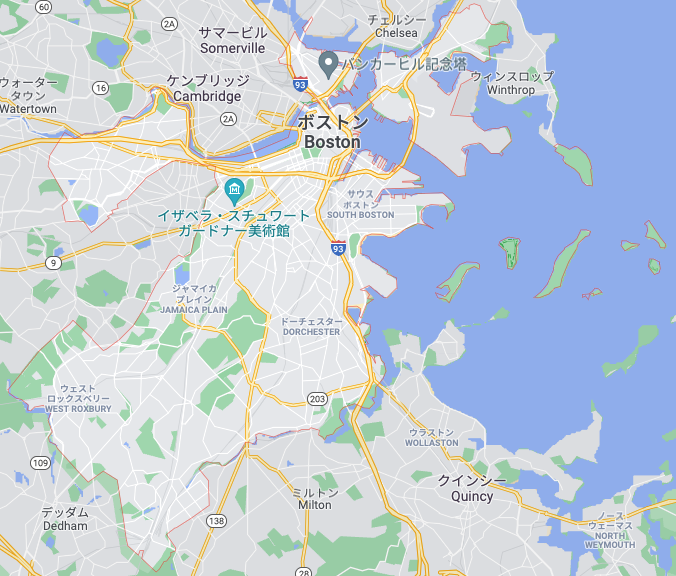

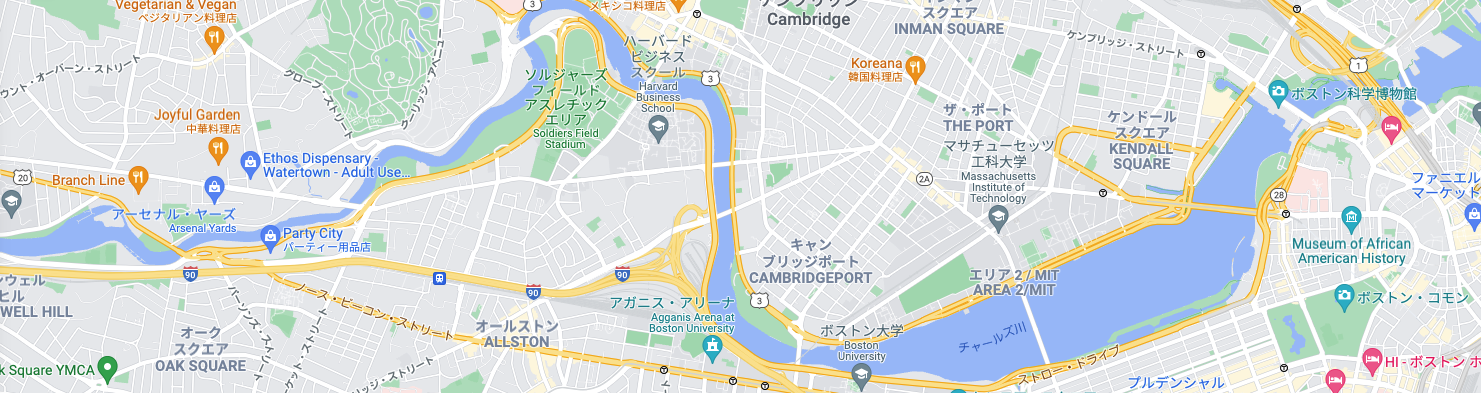

In [5]:
from IPython.display import Image
Image("./boston_area.png")
Image("./boston_river.png")

## データ型、尺度

- 欠損値  
0件  
- データ型
  - object型  
  0件  
  - float型  
  12件  
  - int型  
  2件  

- 質的データ  
  - 名義尺度  
    - CHAS（2値）
  - 順序尺度  
    - なし
  
- 量的データ  
  - 間隔尺度  
    - RM
    - DIS
    - RAD
  - 比例尺度  
    - CRIM
    - ZN
    - INDUS
    - NOX
    - AGE
    - TAX
    - PTRATIO
    - B
    - MEDV

# 目的変数

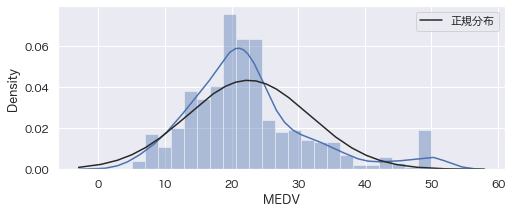

In [6]:
import warnings
warnings.filterwarnings('ignore')

# 正規分布を重ねて描画する
from scipy.stats import norm
plt.figure(figsize=[8,3])
sns.distplot(boston_df['MEDV'], kde=True, fit=norm, fit_kws={'label': '正規分布'}).grid()
plt.legend();

分布の頂点が正規分布から外れている。正規分布ではない。

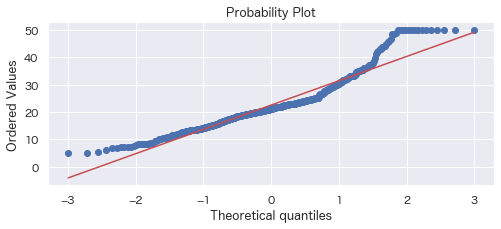

In [7]:
# QQ Plot
plt.figure(figsize=[8,3])
plt.grid()
stats.probplot(boston_df['MEDV'], dist="norm", plot=plt);

In [8]:
boston_df['MEDV'].mean()
boston_df['MEDV'].var()

22.532806324110698

84.5867235940986

In [9]:
# コルモゴロフ・スミルノフ検定(K-S検定)
from scipy import stats
stats.kstest(boston_df['MEDV'], 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

- メモ  
    帰無仮説=正規分布と一致している  
    対立仮説=正規分布と一致していない  

    p値=0.0(四捨五入した値)のため、帰無仮説が棄却される。（正規分布と一致していない）   
    線形モデルの場合は、正規分布に変換した方が良さそう。  

# 欠損値

In [10]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- メモ  
欠損値は含まれない

# 外れ値

In [11]:
# 箱ひげ図
def hige_graph(cols):
    fig, ax = plt.subplots()
    data_ = []
    for col in cols:
        data_.append(boston_df[col])
    ax.set_title('箱ひげ図')
    ax.boxplot(data_, labels=cols)
    plt.grid()
    plt.show();

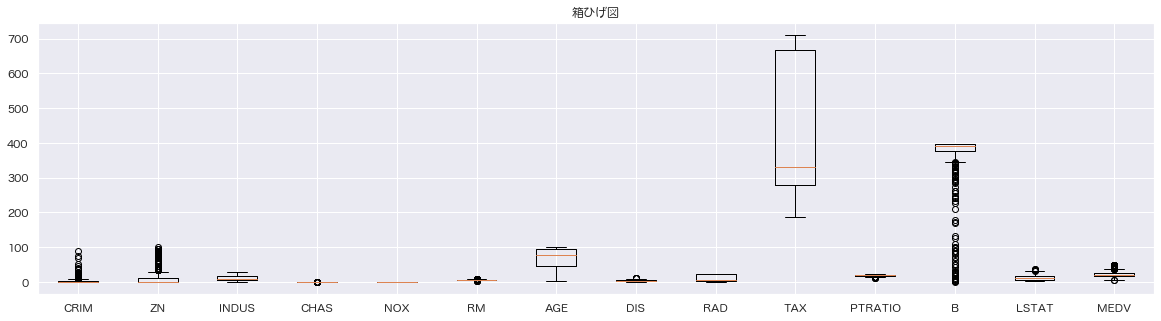

In [12]:
# 全項目
all_col = boston_df.columns
hige_graph(cols=all_col);

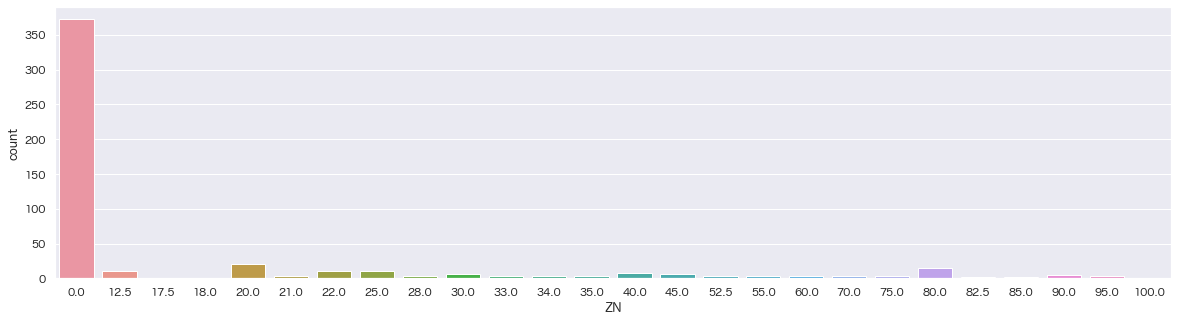

In [13]:
plt.grid()
sns.countplot(boston_df["ZN"]);

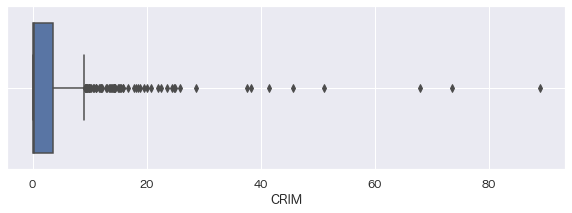

In [68]:
plt.figure(figsize=[10,3])
sns.boxplot(data=boston_df, x='CRIM').grid();

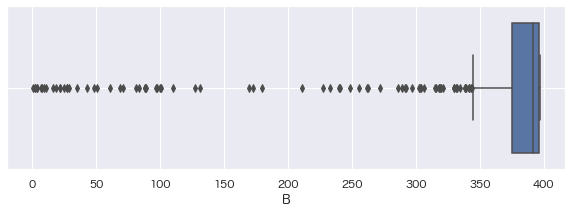

In [70]:
plt.figure(figsize=[10,3])
sns.boxplot(data=boston_df, x='B').grid();

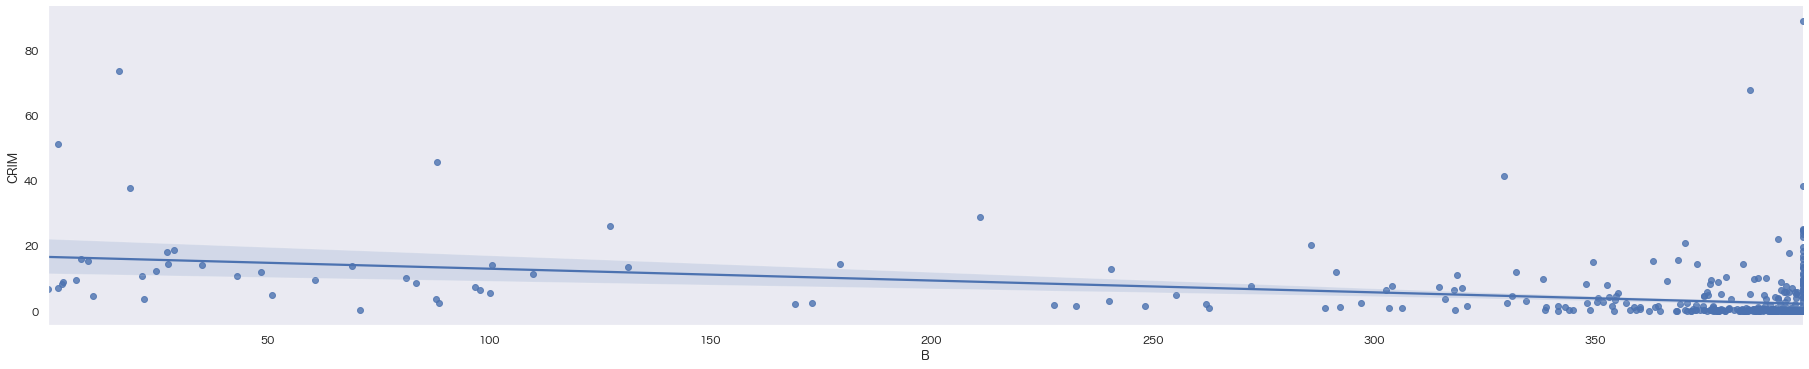

In [16]:
sns.lmplot(x='B',y='CRIM',data=boston_df,aspect=5,height=5);

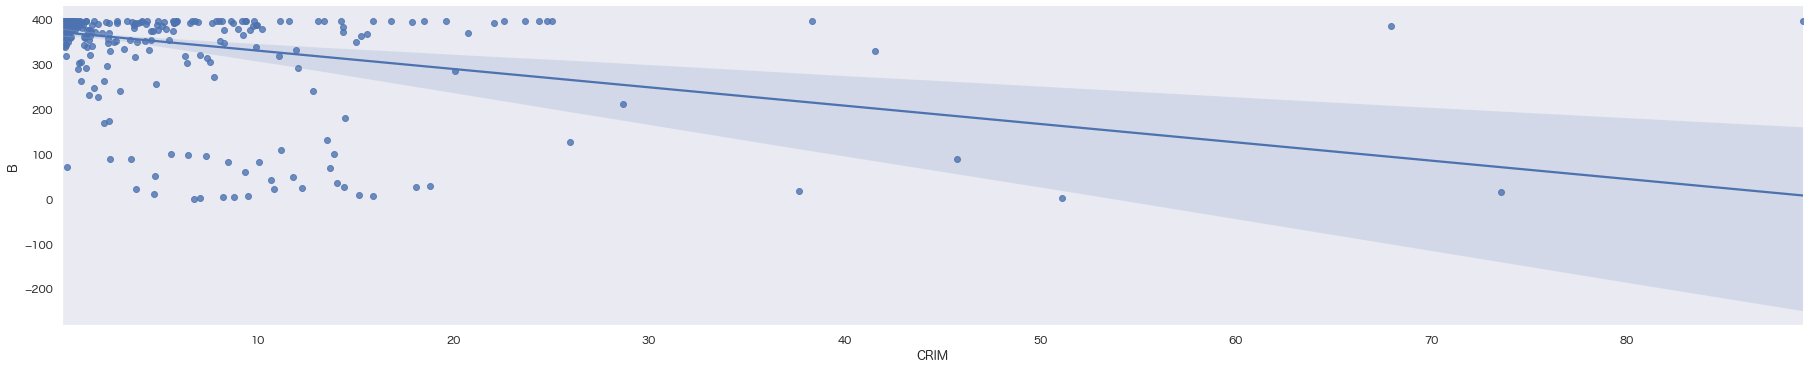

In [17]:
sns.lmplot(x='CRIM',y='B',data=boston_df,aspect=5,height=5);

In [18]:
boston_df[boston_df['CRIM']==boston_df['CRIM'].max()].astype(str)

CRIM   ZN INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX PTRATIO  \
380  88.9762  0.0  18.1    0  0.671  6.968  91.9  1.4165  24  666.0    20.2   

         B  LSTAT  MEDV  
380  396.9  17.21  10.4

In [19]:
boston_df[boston_df['B']<10].astype(str)

CRIM   ZN INDUS CHAS    NOX     RM    AGE     DIS RAD  \
410            51.1358  0.0  18.1    0  0.597  5.757  100.0   1.413  24   
423            7.05042  0.0  18.1    0  0.614  6.103   85.1  2.0218  24   
424  8.792119999999999  0.0  18.1    0  0.584  5.565   70.6  2.0635  24   
425            15.8603  0.0  18.1    0  0.679  5.896   95.4  1.9096  24   
437            15.1772  0.0  18.1    0   0.74  6.152  100.0  1.9142  24   
450            6.71772  0.0  18.1    0  0.713  6.749   92.6  2.3236  24   
454  9.513630000000001  0.0  18.1    0  0.713  6.728   94.1  2.4961  24   
457            8.20058  0.0  18.1    0  0.713  5.936   80.3  2.7792  24   

       TAX PTRATIO     B  LSTAT  MEDV  
410  666.0    20.2   2.6  10.11  15.0  
423  666.0    20.2  2.52  23.29  13.4  
424  666.0    20.2  3.65  17.16  11.7  
425  666.0    20.2  7.68  24.39   8.3  
437  666.0    20.2  9.32  26.45   8.7  
450  666.0    20.2  0.32  17.44  13.4  
454  666.0    20.2  6.68  18.71  14.9  
457  666.0    20.2   3.5  16.94  13.5

- メモ  
    - CRIM  
    外れ値（80）を含む。犯罪率80%は疑わしい値。線形モデルを使用する場合はこの外れ値を除去する。    
    - B.  
    何%で切るか難しいところだが、0.1〜10%台は全体の1.5%。除外しても良いかもしれない。          

# 解析

## 単変量解析

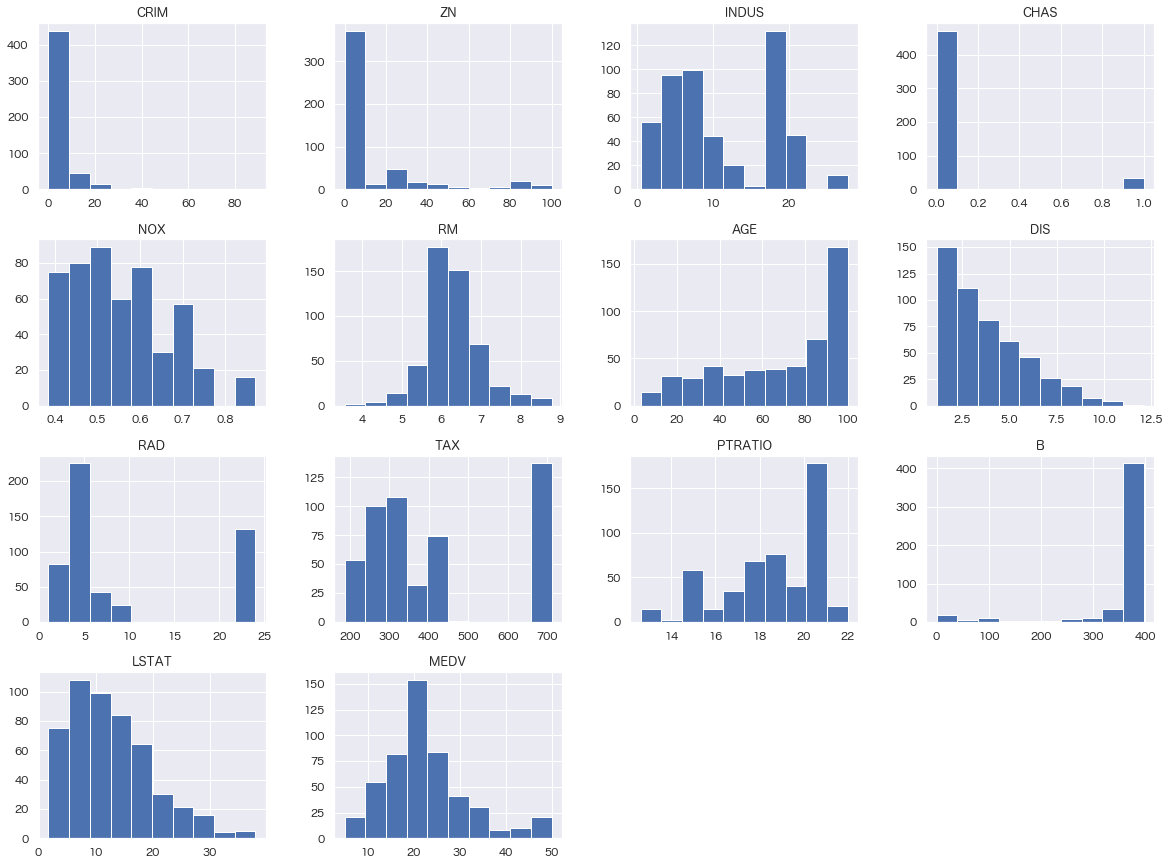

In [20]:
boston_df.hist(bins=10, figsize=(20,15));

In [21]:
boston_df.head().astype(str)

CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  \
0               0.00632  18.0  2.31    0  0.538  6.575  65.2    4.09   1   
1               0.02731   0.0  7.07    0  0.469  6.421  78.9  4.9671   2   
2               0.02729   0.0  7.07    0  0.469  7.185  61.1  4.9671   2   
3  0.032369999999999996   0.0  2.18    0  0.458  6.998  45.8  6.0622   3   
4               0.06905   0.0  2.18    0  0.458  7.147  54.2  6.0622   3   

     TAX PTRATIO       B LSTAT  MEDV  
0  296.0    15.3   396.9  4.98  24.0  
1  242.0    17.8   396.9  9.14  21.6  
2  242.0    17.8  392.83  4.03  34.7  
3  222.0    18.7  394.63  2.94  33.4  
4  222.0    18.7   396.9  5.33  36.2

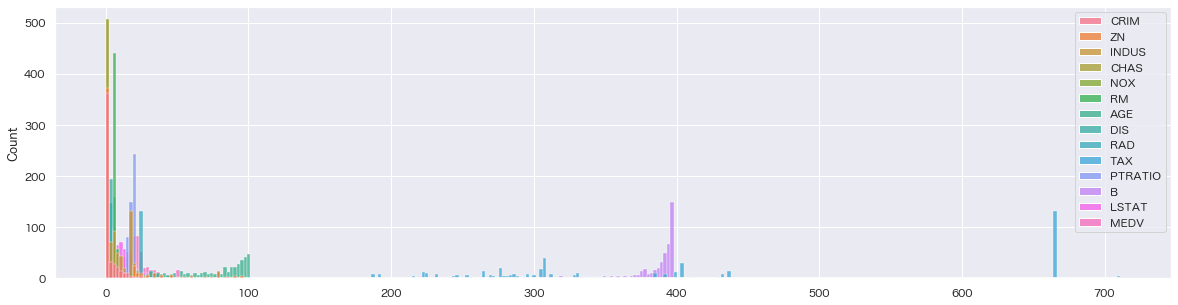

In [22]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[20,5])
sns.histplot(boston_df).grid();

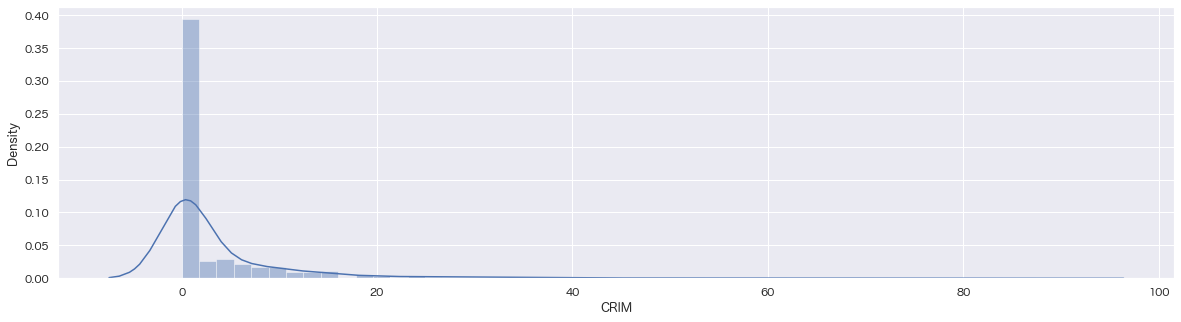

In [72]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[20,5])
sns.distplot(boston_df['CRIM']).grid();

In [24]:
boston_df['CRIM'].describe()

count   506
mean      4
std       9
min       0
25%       0
50%       0
75%       4
max      89
Name: CRIM, dtype: float64

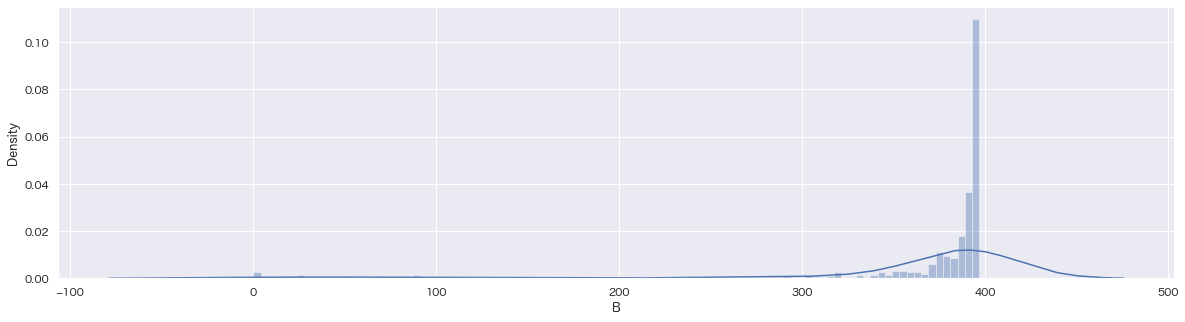

In [71]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[20,5])
sns.distplot(boston_df['B'], bins=100).grid();

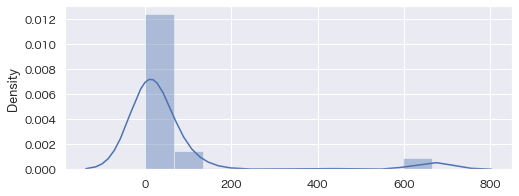

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[8,3])
sns.distplot(boston_df[boston_df['B']<200], bins=10).grid();

In [27]:
boston_df['B'].describe()

count   506
mean    357
std      91
min       0
25%     375
50%     391
75%     396
max     397
Name: B, dtype: float64

In [28]:
def sns_distplot(col_name, bins):
    import warnings
    warnings.filterwarnings('ignore')
    plt.figure(figsize=[8,3])
    sns.distplot(boston_df[col_name], bins=bins).grid();

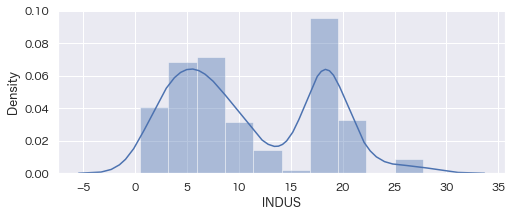

In [29]:
sns_distplot(col_name='INDUS', bins=10)

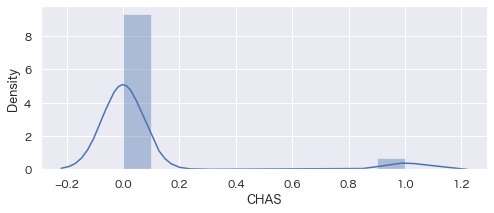

In [30]:
sns_distplot(col_name='CHAS', bins=10)

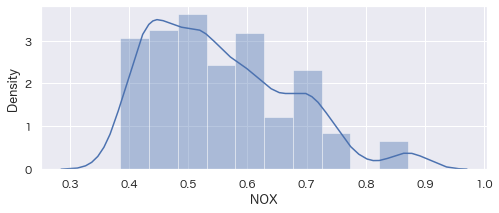

In [31]:
sns_distplot(col_name='NOX', bins=10)

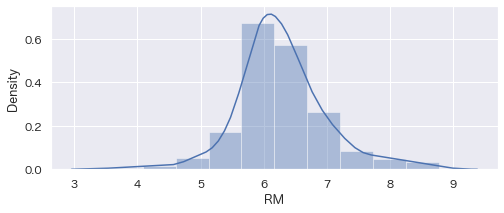

In [32]:
sns_distplot(col_name='RM', bins=10)

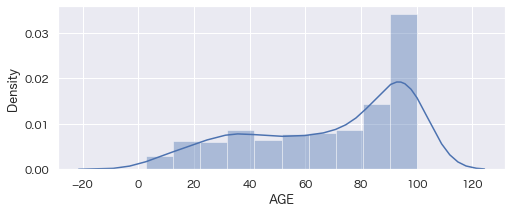

In [33]:
sns_distplot(col_name='AGE', bins=10)

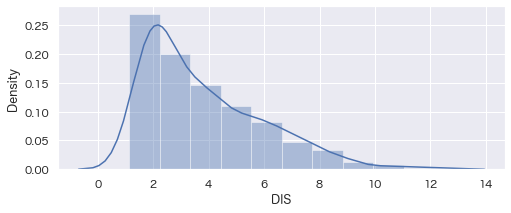

In [34]:
sns_distplot(col_name='DIS', bins=10)

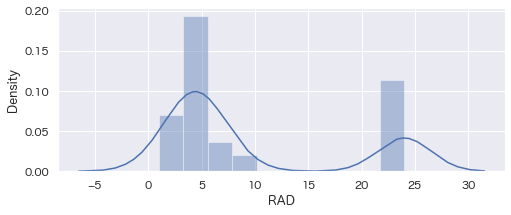

In [35]:
sns_distplot(col_name='RAD', bins=10)

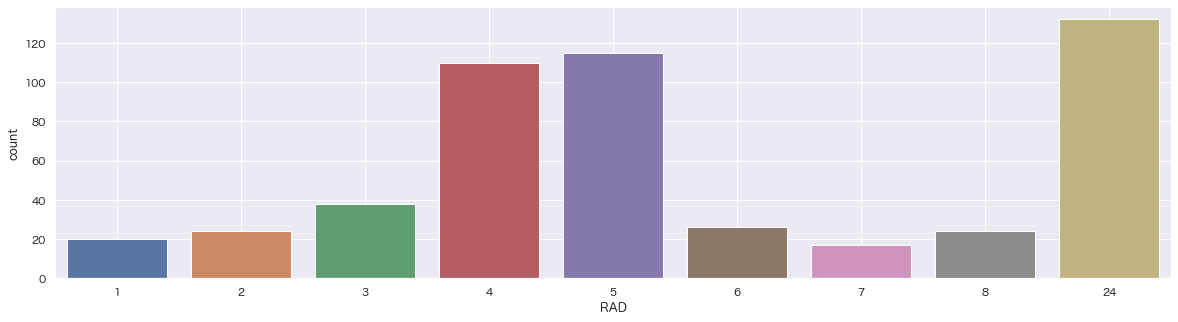

In [73]:
sns.countplot(boston_df["RAD"]).grid();

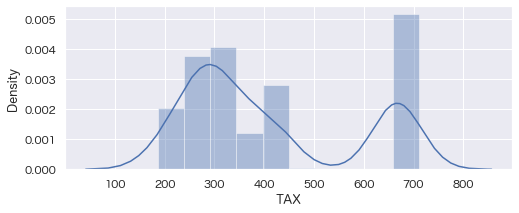

In [37]:
sns_distplot(col_name='TAX', bins=10)

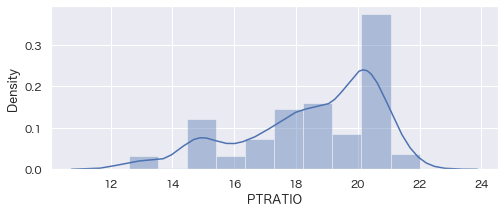

In [38]:
sns_distplot(col_name='PTRATIO', bins=10)

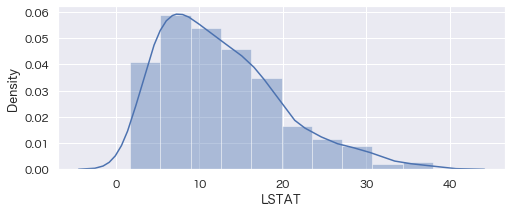

In [39]:
sns_distplot(col_name='LSTAT', bins=10)

- メモ  
    - NOX, RM, DIS, PTRATIO, LSTAT, MEDV  
    モデリングに線形モデルを用いる場合、正規分布に変換（近づける）する処理を施す。    

## 多変量解析

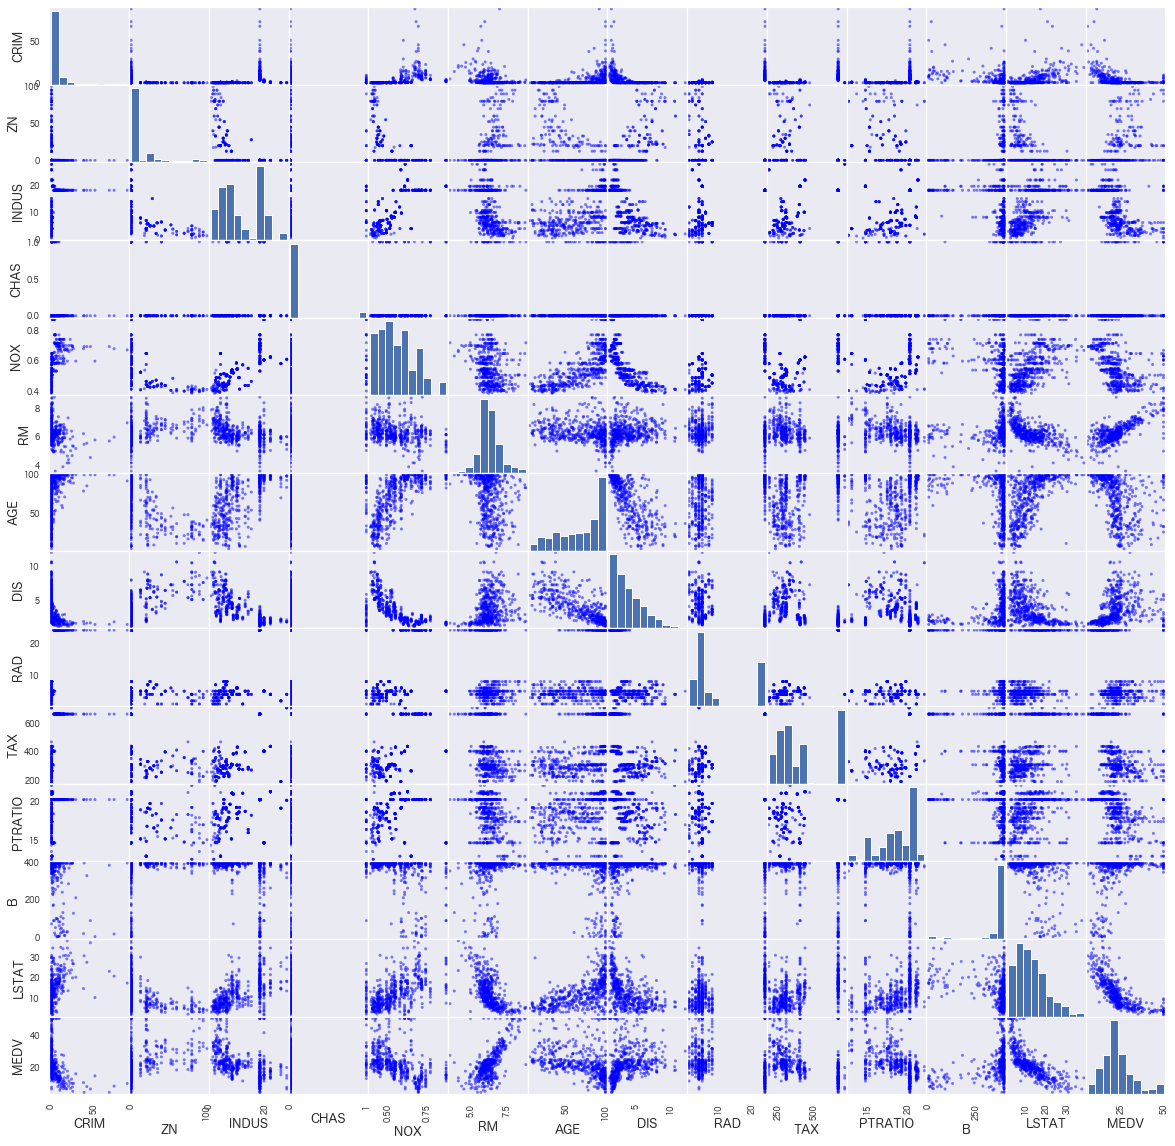

In [40]:
# 散布図行列
pd.plotting.scatter_matrix(boston_df, c='blue', figsize=(20, 20));

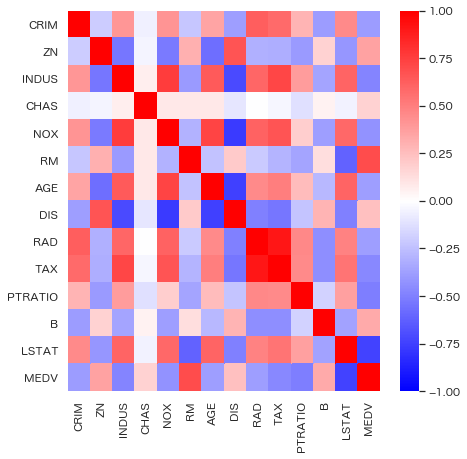

In [41]:
# ヒートマップ
plt.figure(figsize=(7, 7))
sns.heatmap(pd.DataFrame(boston_df).corr(method='pearson'), annot=False, vmin=-1, vmax=1, cmap='bwr', cbar=True);

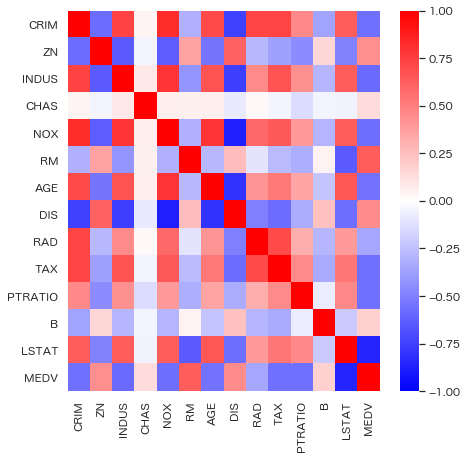

In [42]:
# ヒートマップ
plt.figure(figsize=(7, 7))
sns.heatmap(pd.DataFrame(boston_df).corr(method='spearman'), annot=False, vmin=-1, vmax=1, cmap='bwr', cbar=True);

- メモ  
    - 非線形で相関のありそうな変数  
    CRIM: INDUS, NOX, RM, RAD, TAX  
    INDUS: NOX, DIS  
    NOX: AGE, DIS  
    AGE: DIS  
    RAD: TAX  
    MEDV: LSTAT  
    - 相関の弱い変数  
    CHAS: 単体では不要そう  

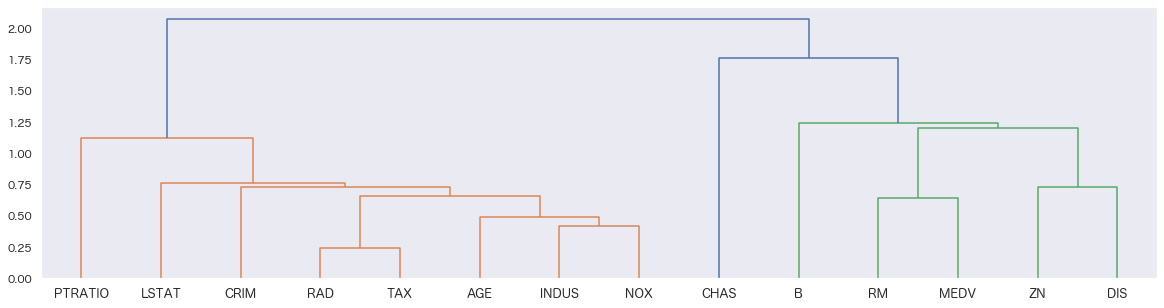

<Figure size 1440x360 with 0 Axes>

In [43]:
# デンドログラムでも確認
from scipy.cluster.hierarchy import linkage, dendrogram

li=linkage(boston_df.corr())
r=dendrogram(li, labels=boston_df.columns)
plt.figure(figsize=[20,5])
plt.show();

### 対目的変数

In [44]:
# 目的変数との関係性を確認
def target_relation(tgt, data):
    y_train = data[tgt]

    # ヒートマップの表示数
    k = len(data.columns)
    fig = plt.figure(figsize=(20,20))

    # 各変数間の相関係数
    corrmat = data.corr()

    # リストの最大値から順にk個の要素を取得
    cols = corrmat.nlargest(k, tgt)[tgt].index

    # 全て可視化
    for i in np.arange(1, k):
        X_train = data[cols[i]]
        ax = fig.add_subplot(4,4, i)
        sns.regplot(x=X_train, y=y_train)
    
    plt.tight_layout()
    plt.show();

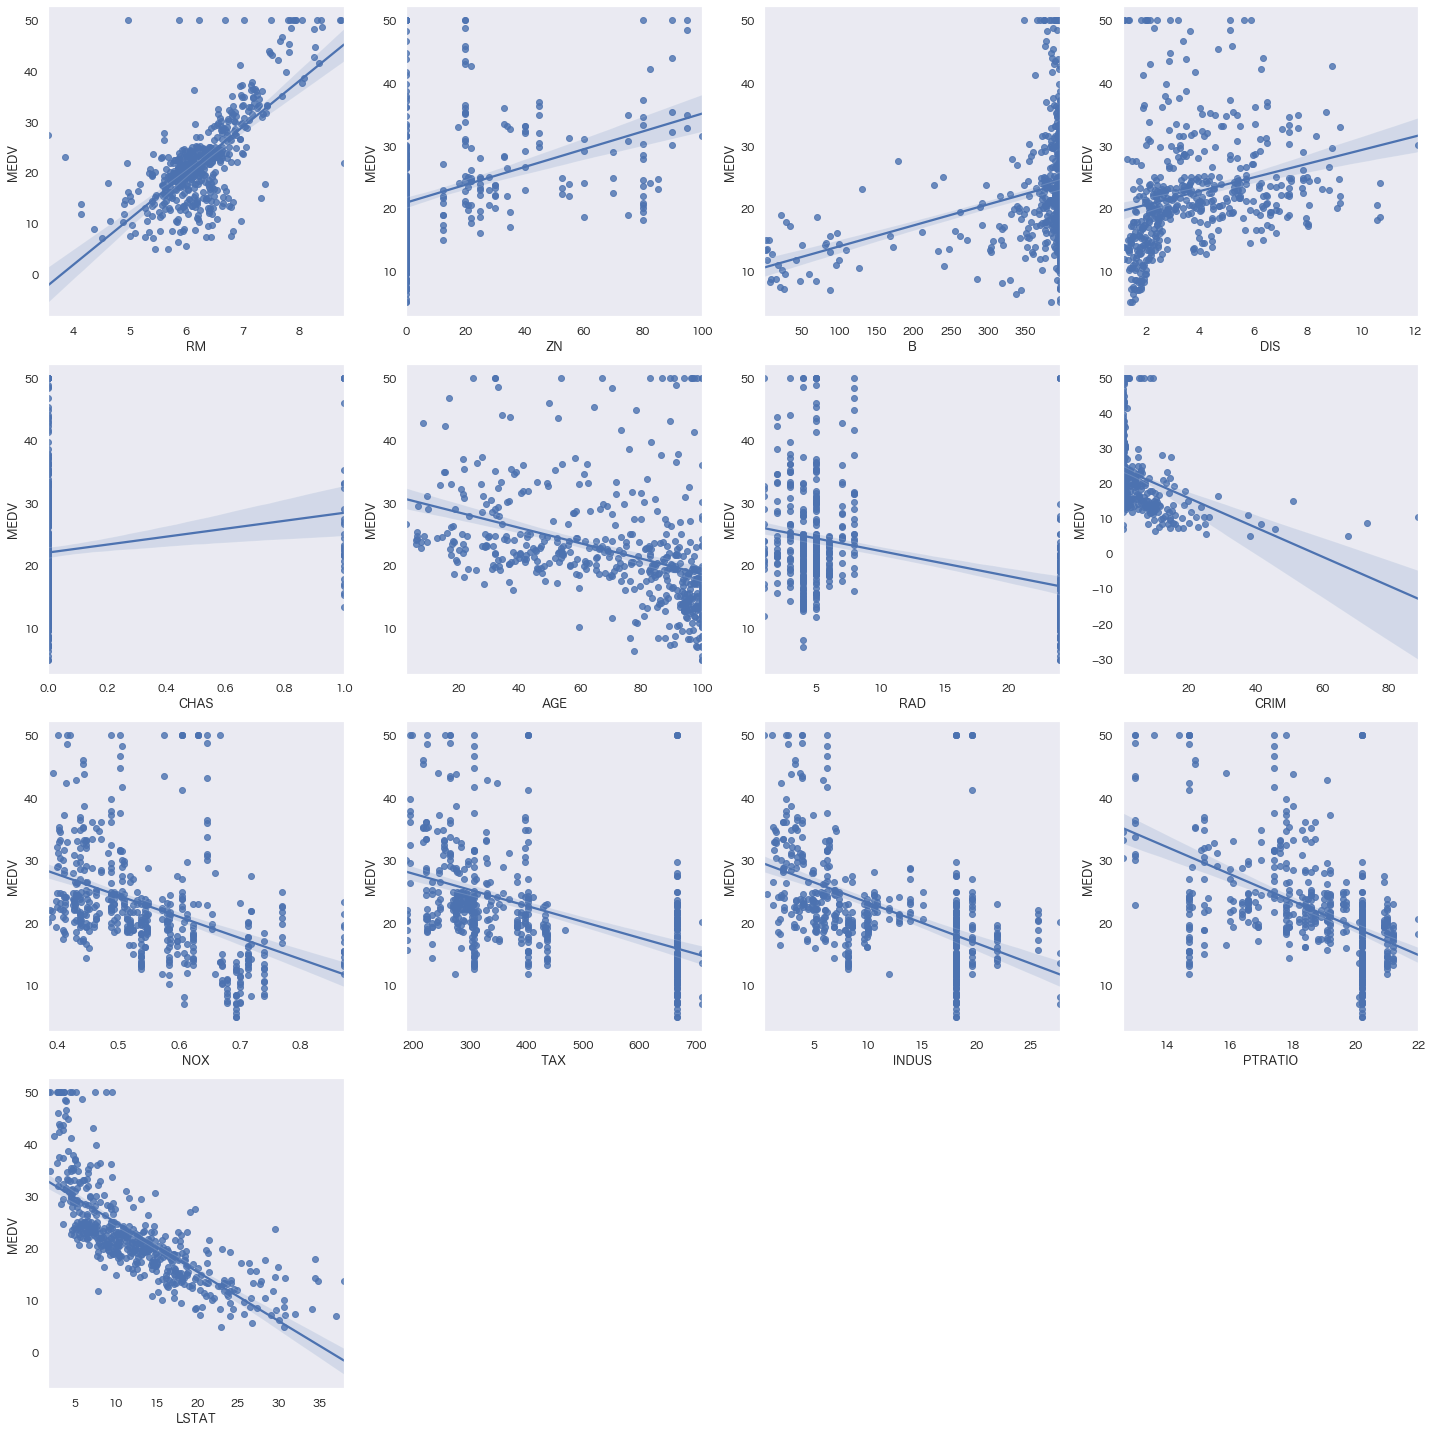

In [45]:
# 目的変数
target_relation(tgt='MEDV', data=boston_df)

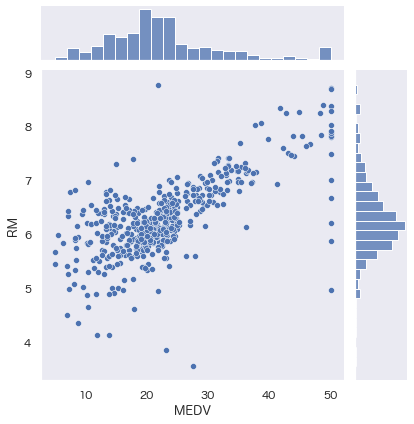

In [46]:
sns.jointplot(x='MEDV', y='RM', data=boston_df);

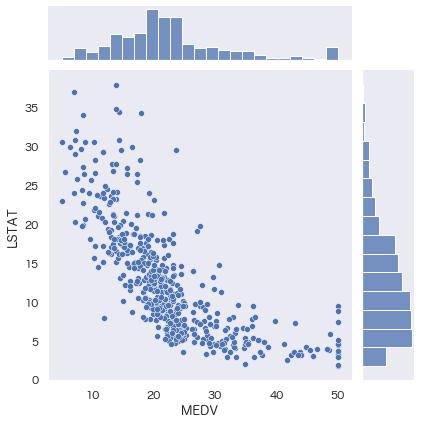

In [47]:
sns.jointplot(x='MEDV', y='LSTAT', data=boston_df);

- メモ  
RM, LSTATは目的変数と線形性が関係がある。

### 目的変数⇆int型変数

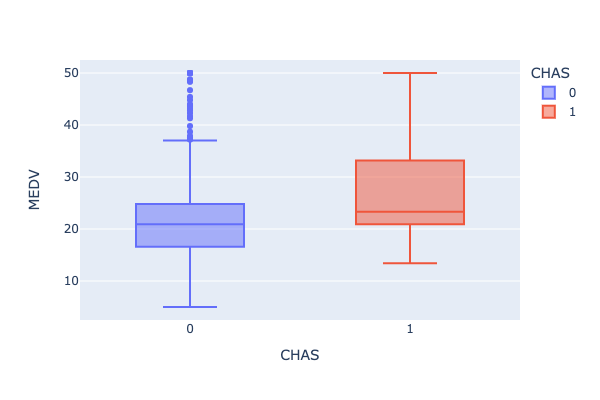

In [103]:
import plotly.express as px
from IPython.display import Image

# fig = px.box(boston_df, x="CHAS", y="MEDV", color="CHAS", width=600, height=400)
# fig.show()
Image("./newplot1.png")

川に面している住宅（CAHS＝1）価格の方が、少し高い。  
CAHS＝０で高級住宅は、外れ値となっている。  

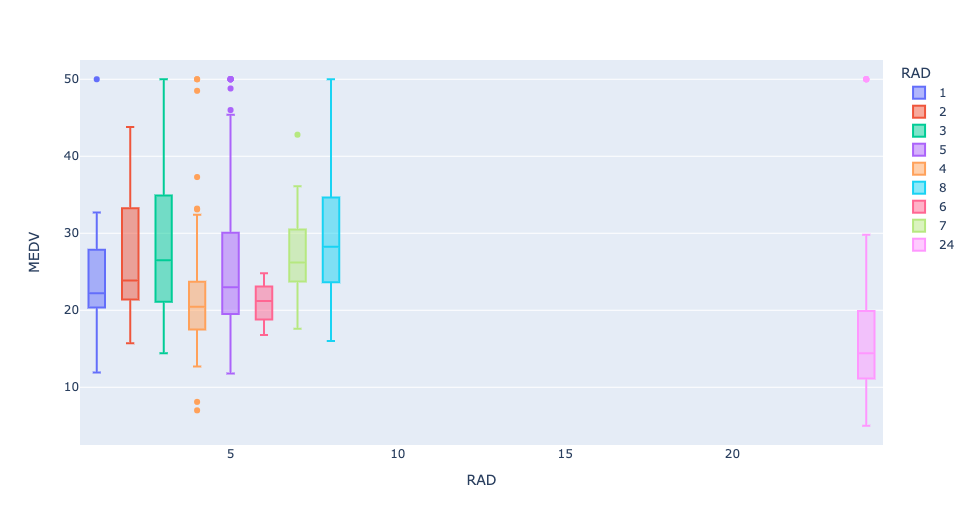

In [105]:
# fig = px.box(boston_df, x="RAD", y="MEDV", color="RAD")
# fig.show()
Image("./newplot2.png")

- メモ  
低価格帯は、RAD=24しかカバーできていない。

### 三変量以上

非線形で相関のありそうな変数  
CRIM: INDUS, NOX, RM, RAD, TAX  
INDUS: NOX, DIS  
NOX: AGE, DIS  
AGE: DIS  
RAD: TAX  
MEDV: LSTAT  

#### 目的変数⇆RM　＋　α

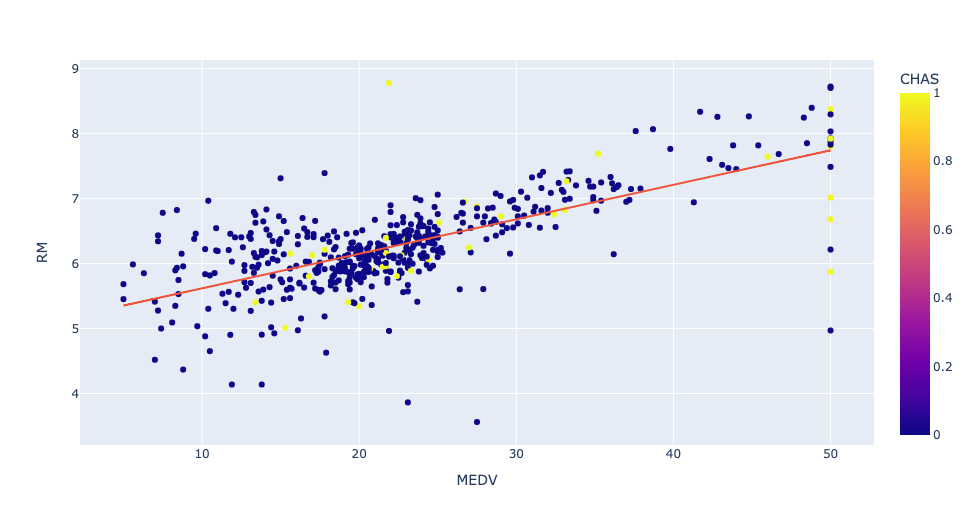

In [106]:
# fig = px.scatter (boston_df, x = "MEDV", y = "RM", color = "CHAS",  trendline="ols")
# fig.show()
Image("./newplot3.png")

- メモ  
CHAS=0はノイズを含んでいる。

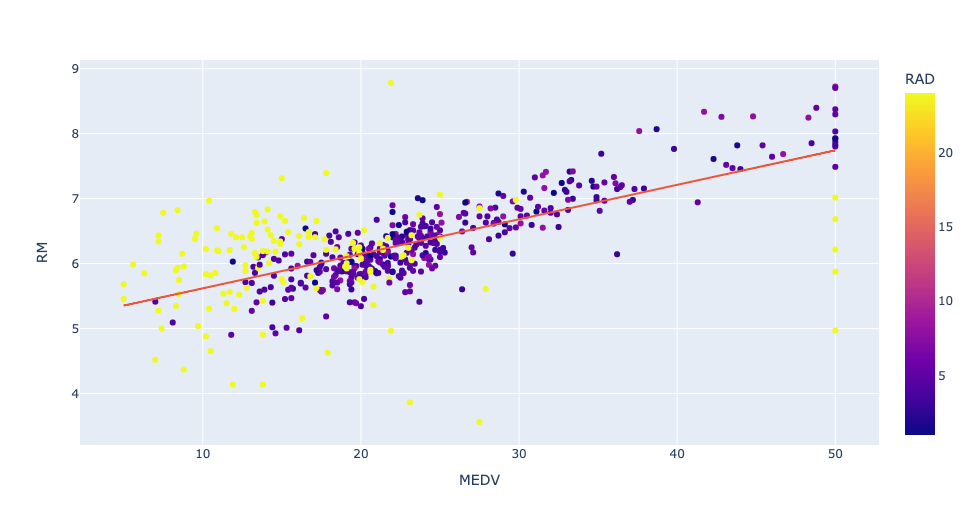

In [108]:
# fig = px.scatter(boston_df, x = "MEDV", y = "RM", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot4.png")

#### 目的変数⇆LSTAT　＋　α

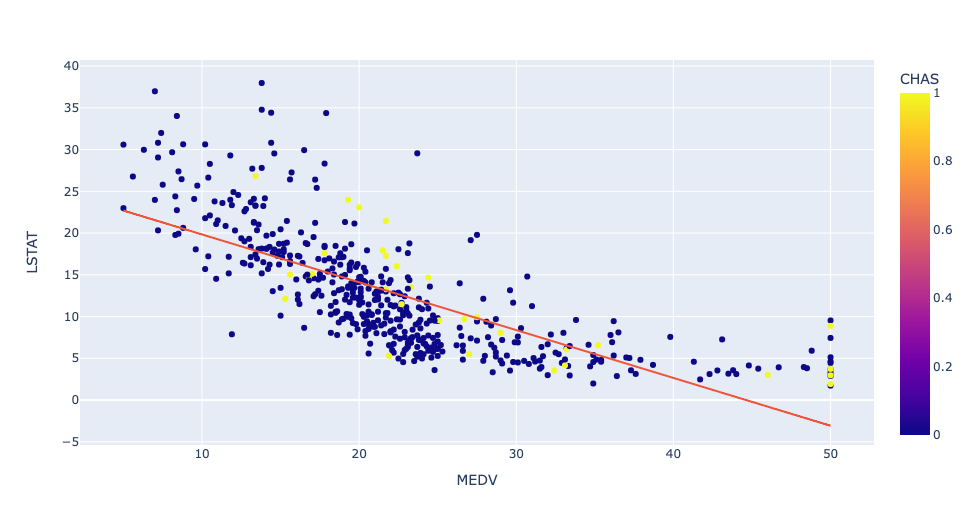

In [109]:
# fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "CHAS",  trendline="ols")
# fig.show()
Image("./newplot5.png")

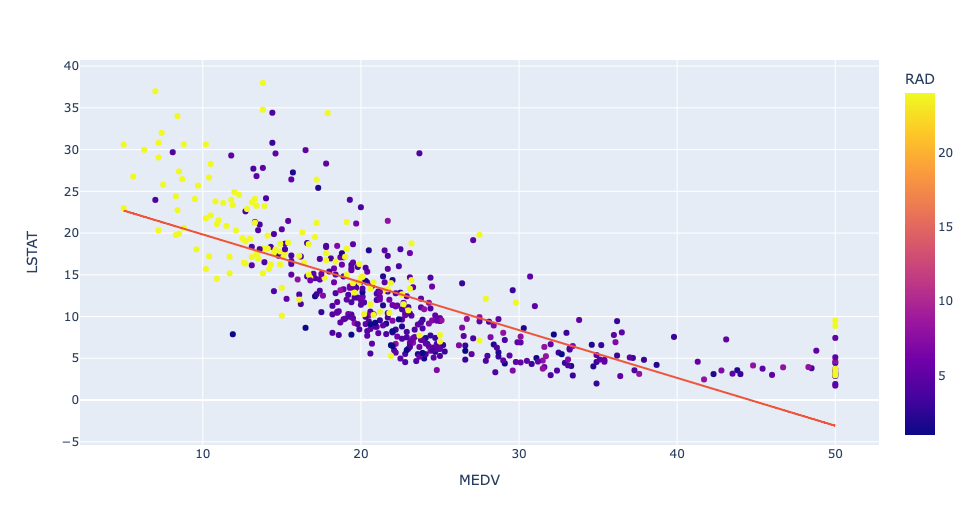

In [110]:
# fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot6.png")

- メモ  
RAD=24は外れる傾向がある。

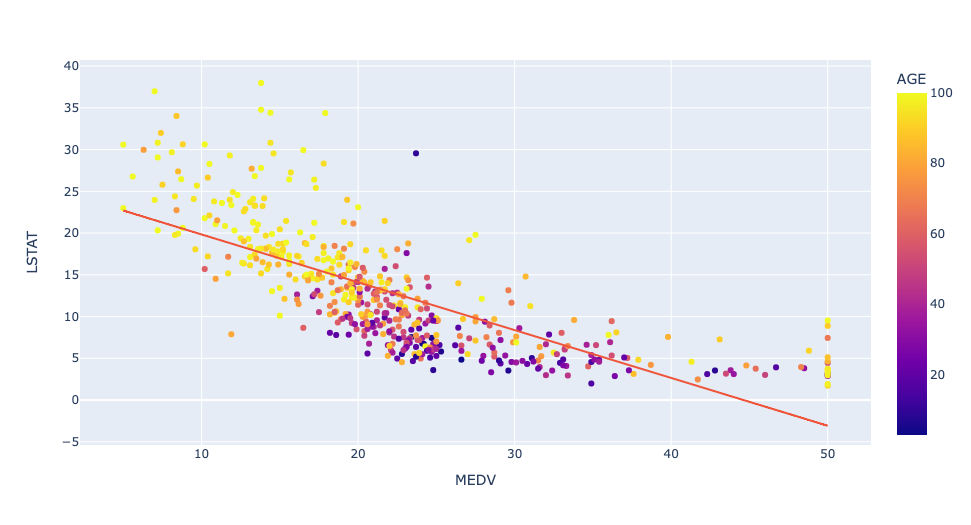

In [111]:
# fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "AGE",  trendline="ols")
# fig.show()
Image("./newplot7.png")

- メモ  
80代以上は外れる傾向がある。

#### 目的変数⇆CRIM, DIS, AGE, B ＋　α

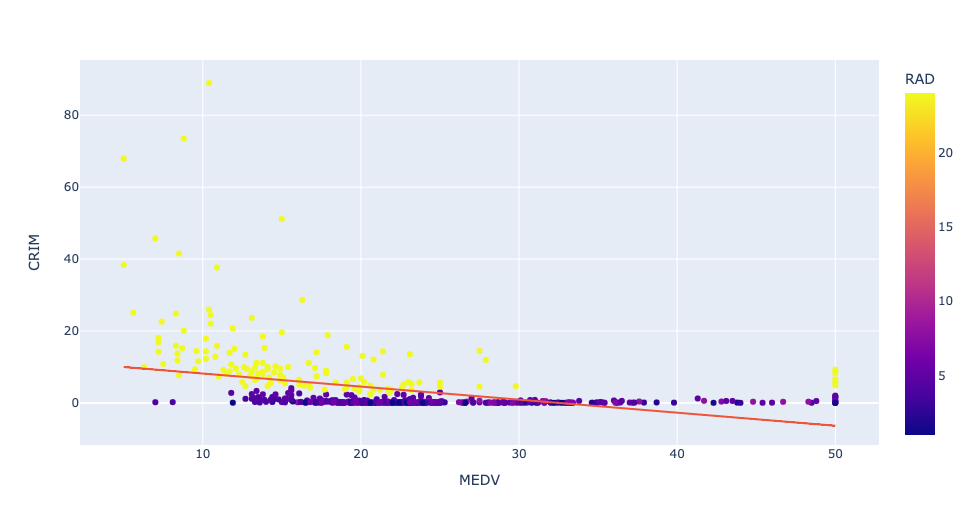

In [112]:
# fig = px.scatter (boston_df, x = "MEDV", y = "CRIM", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot8.png")

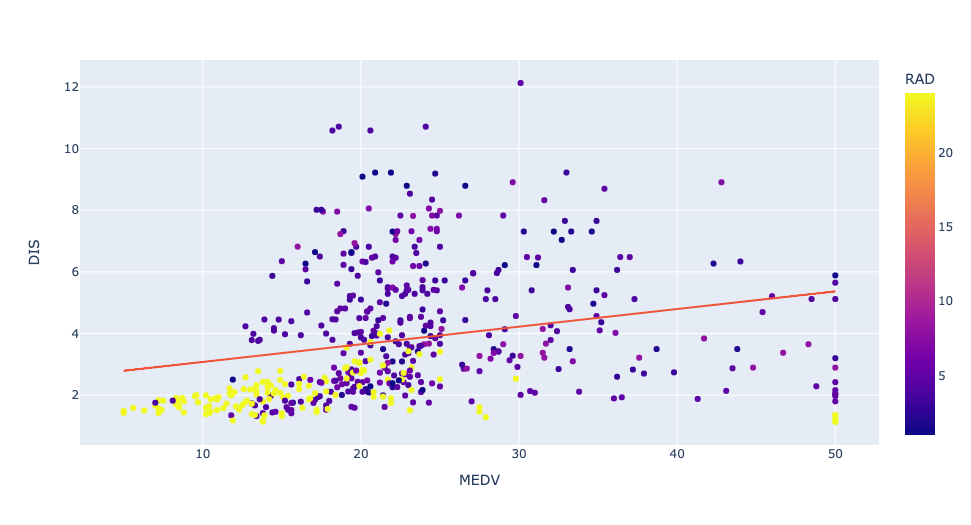

In [113]:
# fig = px.scatter (boston_df, x = "MEDV", y = "DIS", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot9.png")

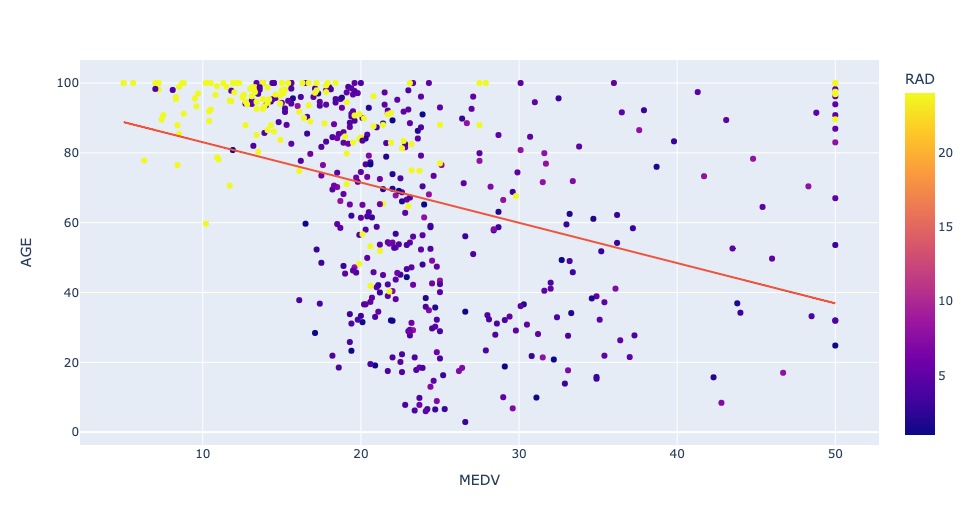

In [114]:
# fig = px.scatter (boston_df, x = "MEDV", y = "AGE", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot10.png")

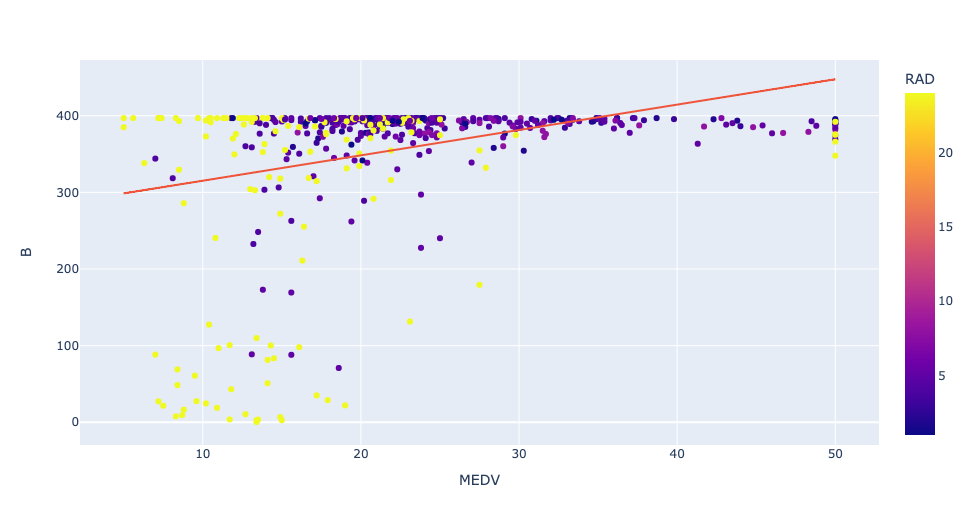

In [115]:
# fig = px.scatter (boston_df, x = "MEDV", y = "B", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot11.png")

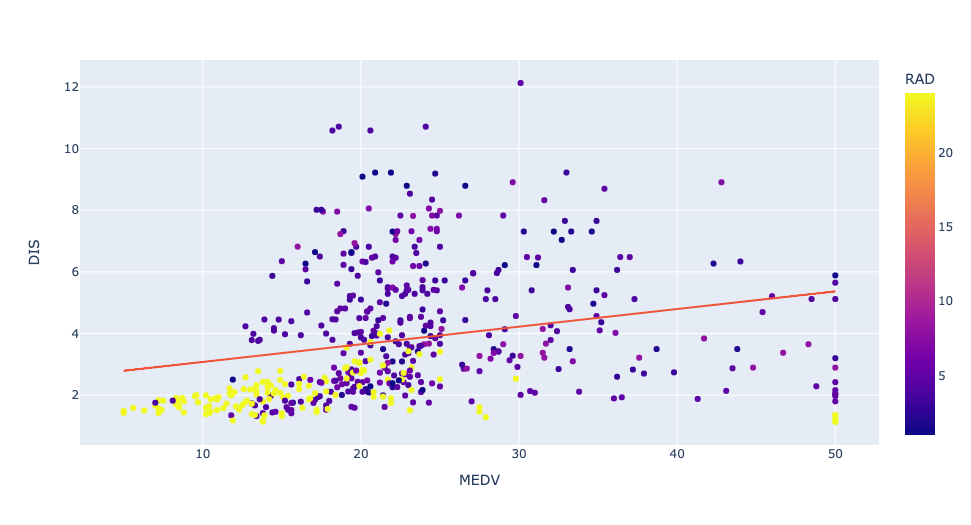

In [116]:
# fig = px.scatter (boston_df, x = "MEDV", y = "DIS", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot12.png")

#### 割合の確認

In [60]:
# 積み立て棒グラフ
def stack_graph(columns):
    tgt_df = pd.DataFrame()
    for i in range(24):
        tgt_df['RAD' + str(i+1)] = boston_df[boston_df['RAD'] == i+1][columns].mean()

    plt.figure(figsize=[20,5])
    my_plot = tgt_df.T.plot(kind='bar', stacked=True, title="各クラスタの平均")
    my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
    plt.grid()

<Figure size 1440x360 with 0 Axes>

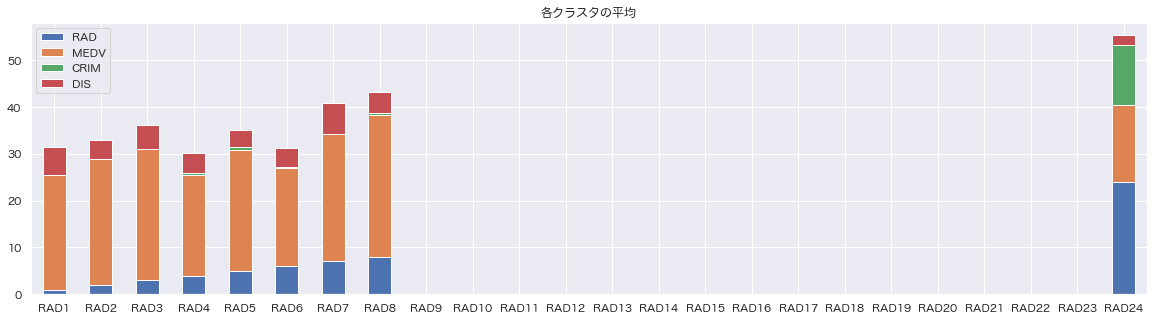

In [61]:
columns = ['RAD', 'MEDV', 'CRIM', 'DIS']
stack_graph(columns);

<Figure size 1440x360 with 0 Axes>

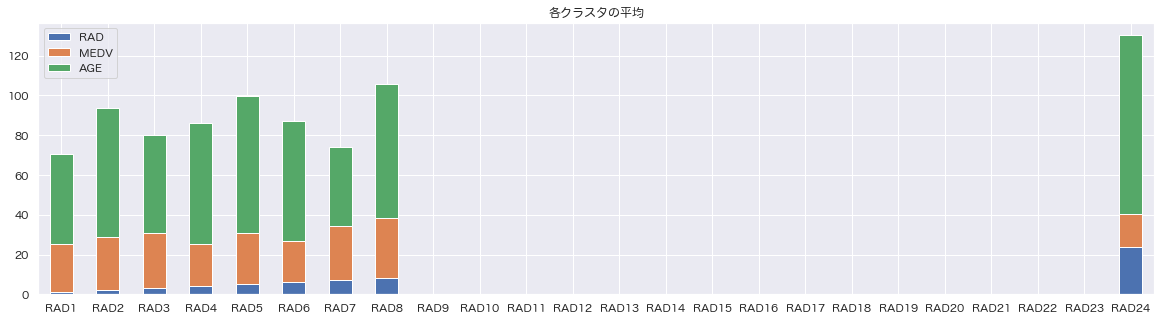

In [62]:
columns = ['RAD', 'MEDV', 'AGE']
stack_graph(columns);

#### ZN、INDUS、TAX、PTRATIO

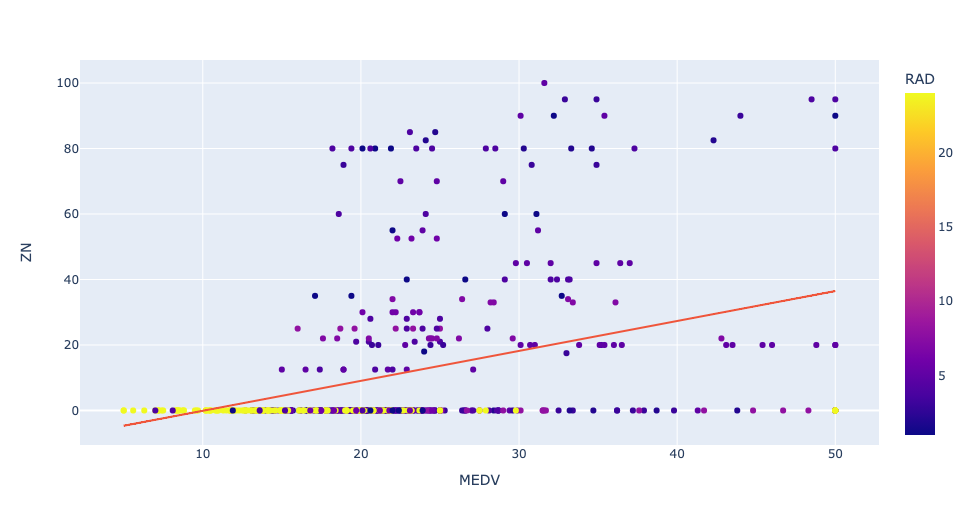

In [117]:
# fig = px.scatter (boston_df, x = "MEDV", y = "ZN", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot13.png")

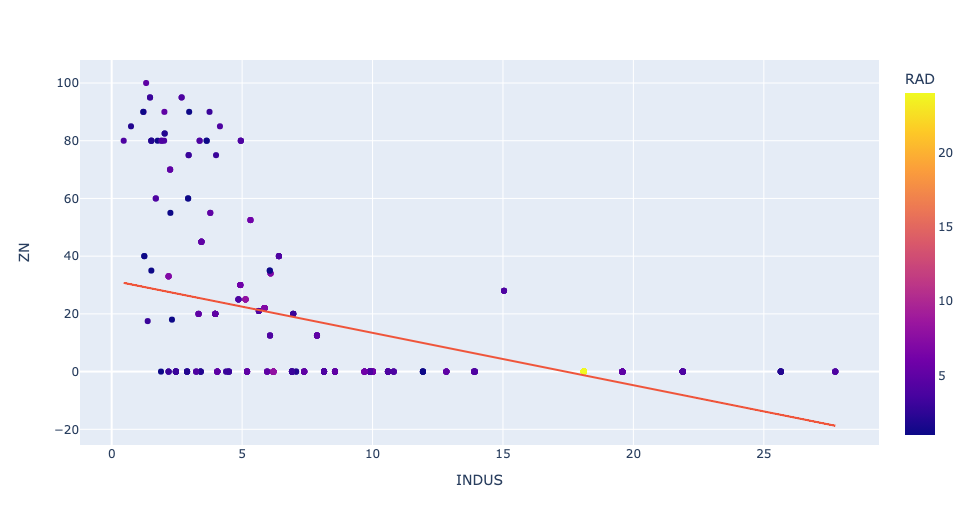

In [118]:
# fig = px.scatter (boston_df, x = "INDUS", y = "ZN", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot14.png")

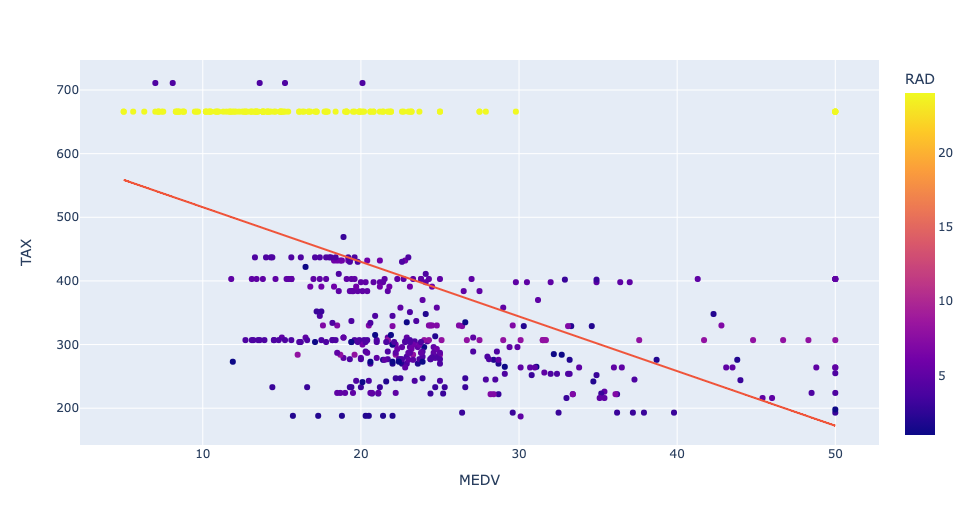

In [119]:
# fig = px.scatter (boston_df, x = "MEDV", y = "TAX", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot15.png")

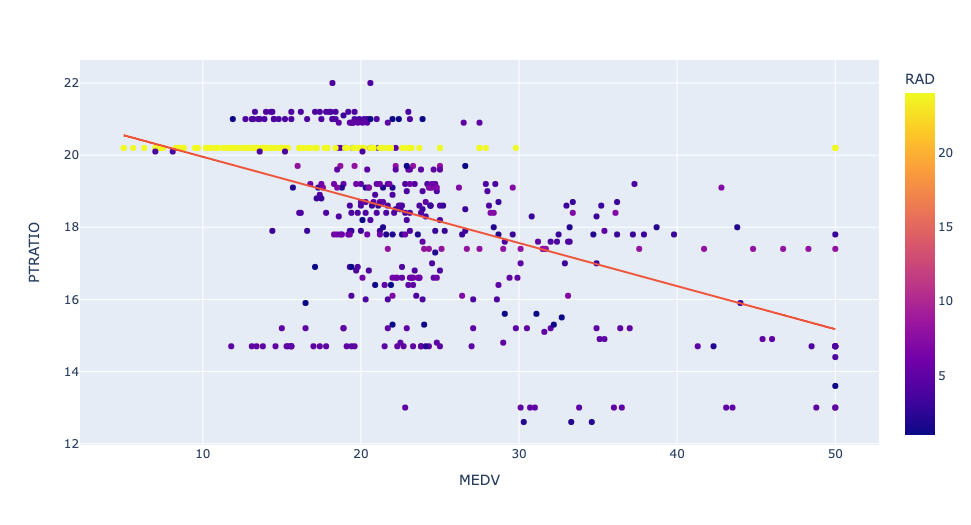

In [120]:
# fig = px.scatter (boston_df, x = "MEDV", y = "PTRATIO", color = "RAD",  trendline="ols")
# fig.show()
Image("./newplot16.png")

- メモ  
    - ZN、TAX、PTRATIO   
    目的変数への影響は低そう。  

    - INDUS  
    INDUSはすこし影響しそう。  